In [50]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Load the dataset**

In [51]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

In [52]:
X_train.shape

(60000, 28, 28)

In [53]:
X_test.shape

(10000, 28, 28)

In [54]:
X_train[0].shape

(28, 28)

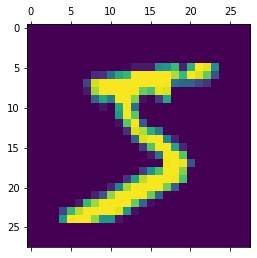

In [55]:
plt.matshow(X_train[0])

In [56]:
y_train[0]

5

In [57]:
X_train = X_train / 255
X_test = X_test / 255

**Using CNN for Classification**

In [58]:
cnn = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [59]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [61]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 2.3192 - accuracy: 0.1221


[2.3191874027252197, 0.12210000306367874]

In [62]:
history = cnn.fit(X_train, y_train,
          batch_size=128, epochs=5,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/5
469/469 - 24s - loss: 0.2369 - accuracy: 0.9323 - val_loss: 0.0832 - val_accuracy: 0.9747 - 24s/epoch - 51ms/step
Epoch 2/5
469/469 - 23s - loss: 0.0735 - accuracy: 0.9788 - val_loss: 0.0650 - val_accuracy: 0.9793 - 23s/epoch - 50ms/step
Epoch 3/5
469/469 - 23s - loss: 0.0497 - accuracy: 0.9856 - val_loss: 0.0531 - val_accuracy: 0.9831 - 23s/epoch - 50ms/step
Epoch 4/5
469/469 - 23s - loss: 0.0383 - accuracy: 0.9886 - val_loss: 0.0479 - val_accuracy: 0.9845 - 23s/epoch - 50ms/step
Epoch 5/5
469/469 - 23s - loss: 0.0291 - accuracy: 0.9914 - val_loss: 0.0450 - val_accuracy: 0.9845 - 23s/epoch - 50ms/step


In [63]:
history.history

{'loss': [0.23687033355236053,
  0.07348500937223434,
  0.0496671125292778,
  0.03827115148305893,
  0.02908395603299141],
 'accuracy': [0.9322500228881836,
  0.9787999987602234,
  0.9855999946594238,
  0.9886000156402588,
  0.9914166927337646],
 'val_loss': [0.08316133171319962,
  0.06495745480060577,
  0.05306529998779297,
  0.0478937029838562,
  0.044958118349313736],
 'val_accuracy': [0.9746999740600586,
  0.9793000221252441,
  0.9830999970436096,
  0.984499990940094,
  0.984499990940094]}

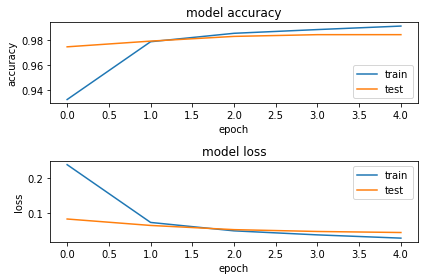

In [64]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()